# **Analysis Report on Loan Approval Dataset**

This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data.

## Data Column Representation

| Column Name                                   | Description                                           | Type        |
|-----------------------------------------------|-------------------------------------------------------|-------------|
| `person_age`                                  | Age of the person                                     | Float       |
| `person_gender`                               | Gender of the person                                  | Categorical |
| `person_education`                            | Highest education level                               | Categorical |
| `person_income`                               | Annual income                                         | Float       |
| `person_emp_exp`                             | Years of employment experience                         | Integer     |
| `person_home_ownership`                       | Home ownership status (e.g., rent, own, mortgage)    | Categorical |
| `loan_amnt`                                   | Loan amount requested                                  | Float       |
| `loan_intent`                                 | Purpose of the loan                                   | Categorical |
| `loan_int_rate`                               | Loan interest rate                                    | Float       |
| `loan_percent_income`                         | Loan amount as a percentage of annual income          | Float       |
| `cb_person_cred_hist_length`                 | Length of credit history in years                     | Float       |
| `credit_score`                                | Credit score of the person                            | Integer     |
| `previous_loan_defaults_on_file`              | Indicator of previous loan defaults                    | Categorical |
| `loan_status (target variable)`               | Loan approval status: 1 = approved; 0 = rejected      | Integer     |


https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

## **Library Importation and Data Loading**

In [1]:
# Import Libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define Colour Theme
colour = ['#DFF2EB', '#B9E5E8', '#7AB2D3', '#4A628A']

In [3]:
# Load the Data
loan_df = pd.read_csv('loan_data.csv')

In [4]:
# Show the Data
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
# Check the Data Information
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

The dataset have a total 45k data with mainly object and float type data features.

In [6]:
# Verify if there is Any Missing Values
loan_df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In the dataset there is no missing values present and it is clear.

In [7]:
# Check for Duplicates
loan_df.duplicated().sum()

0

Data has no Duplicate Values

In [8]:
# Check Statistics Description
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


1. The avg. age of the person is 27.8 years with a std of 6 years and maxium age 144 years indicating the outliers presence.
2. Person avg. income is 80.3k while containing few presence of outliers.
3. All the numerical features have few outliers which needs to be confirm.

### **Check Outliers**

In [9]:
# Check for Outliers by using IQR Value for numerical data
num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                     'credit_score']

In [10]:
# Calculate Q1 and Q3 for each Numerical Column using IQR Method
Q1 = loan_df[num_cols].quantile(0.25)
Q3 = loan_df[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [11]:
# Identify outliers based on IQR method
outliers = ((loan_df[num_cols] < (Q1 - 1.5 * IQR)) |
            (loan_df[num_cols] > (Q3 + 1.5 * IQR)))


In [12]:
# Count the Number of Outliers
outlier_count = outliers.sum()

# Display Total Outlier Count
outlier_count

,0
person_age,2188
person_income,2218
person_emp_exp,1724
loan_amnt,2348
loan_int_rate,124
loan_percent_income,744
cb_person_cred_hist_length,1366
credit_score,467


There are many outliers present in the dataset.

## **Data Cleaning**

### **Handle Outliers**

Hanlding Outliers is important because if outliers are present it can skew the result and lead the model to be biased reducing the accuracy of the analysis.

In [13]:
# Remove rows with outliers
loan_df = loan_df[~((loan_df[num_cols] < (Q1 - 1.5 * IQR)) |
                                (loan_df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
# Check if Outliers are Removed
outliers_removed = ((loan_df[num_cols] < (Q1 - 1.5 * IQR)) |
                    (loan_df[num_cols] > (Q3 + 1.5 * IQR)))


# Count the Sum
outlier_count_removed = outliers_removed.sum()

In [15]:
# Verify Outlier Count - After Removing Them
outlier_count_removed

,0
person_age,0
person_income,0
person_emp_exp,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_cred_hist_length,0
credit_score,0


In [16]:
# Reset the Index
loan_df.reset_index(drop=True, inplace=True)

## **Analysis**

### **Distribution of Loan Status**

In [30]:
# Function to make Pie Chart
def dist_loan_count(dataset):
  """
  The function creates the pie chart for the loan status for the given data.

  Input:
  dataset =  Dataframe that needs to be visualised

  Output:
  Pie Chart
  """
  # Count the Unique Value in Loan Status
  count_unique =  dataset['loan_status'].value_counts()

  # Add Labels for Better Understanding
  labeles = ['Rejected', 'Approved'] if set(count_unique.index) == {1,0} else ['Approved', 'Rejected']

  # Define the Figure Size
  plt.figure(figsize=(8, 8))

  # Make a Pie Chart
  wedg, texts, autotext = plt.pie(count_unique, labels = labeles, autopct = "%1.1f%%", colors=colour, wedgeprops={'edgecolor': colour[3], 'linewidth': 0.7},
                                  startangle=90, pctdistance=0.75)

  # Add Few Styling with a Suitable Title
  plt.setp(autotext, size=8, color="black", weight="bold")
  plt.title('Distribution of Loan Status', fontsize=14)
  plt.show()

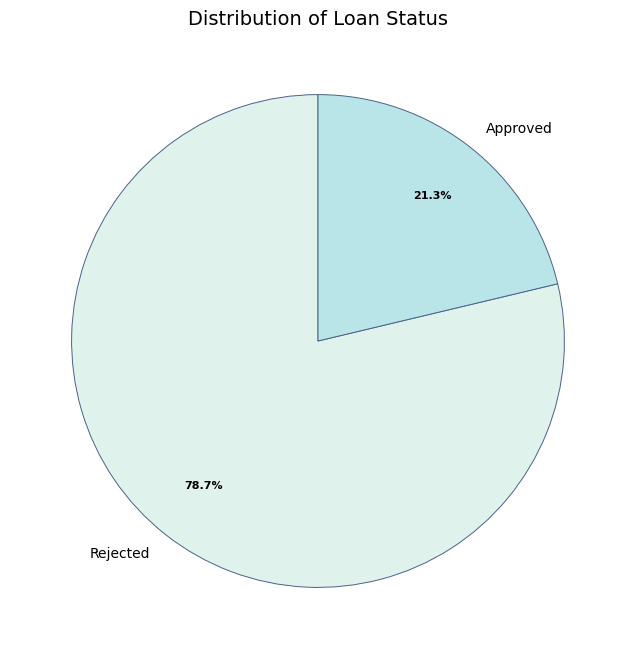

In [31]:
# Call the Function to Make the Plot
dist_loan_count(loan_df)

The pie chart shows the distribution of the loan status for the dataset, it is seen that a total of 78.7% people loan has been rejected and only 21.3% people loan has only been approved.

### **Income Based on Education**

In [19]:
# Function to see Income Based on Education
def income_on_edu(dataset):
  """
  This function makes a bar plot for showing mean income based on the person education.

  Input:
  dataset = Dataframe that needs to be visualised

  Output:
  Bar Plot
  """
  # Group the Data by Education and Estimate the Mean Income for
  income_by_edu = dataset.groupby('person_education')['person_income'].mean()

  # Sort the Values in Descending Order for Better Visualisation
  income_by_edu = income_by_edu.sort_values(ascending=False)

  # Create a Bar Plot with Defined Figure Size
  plt.figure(figsize=(10, 6))
  bar_plt = sns.barplot(x=income_by_edu.index, y=income_by_edu.values, palette=colour)

  # Add Suitable Labels
  plt.ylabel("Mean Income for Individual", fontsize = 10)
  plt.xlabel("Person Education Level", fontsize = 10)

  # Add a Suitable Title
  plt.title("Mean Income for Individual Based on Education", fontsize = 14)

  # Add Annotation to Each Bar for Better Distribution Understanding
  for income in bar_plt.patches:
    bar_plt.annotate(f'{income.get_height():.0f}', (income.get_x() + income.get_width() / 2, income.get_height()),
                     ha='center', va='center', fontsize=8, color='black', xytext=(0, 7),
                     textcoords='offset points')

  # Show the Plot
  plt.show()

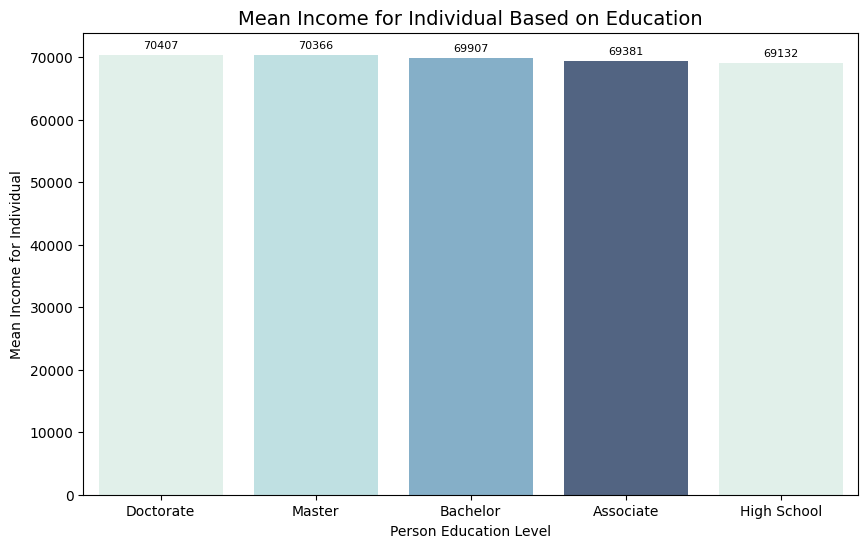

In [20]:
# Call the Function
income_on_edu(loan_df)

The bar chart shows the mean income based on different education levels present in the data. It shows that higher education level has high income and education plays a significant role in determining the person earning.

### **Income vs Loan Percent**

In [21]:
def income_vs_loan(dataset):
  """
  This function make a plot to show how person income is related to loan percent income.

  Input:
  dataset = Dataframe that needs to be visualised

  Output:
  Scatter Plot
  """
  # Define a Figure Size
  plt.figure(figsize=(10, 6))

  # Make a Scatter Plot
  scatter_plt = sns.scatterplot(data=dataset, x='person_income', y='loan_percent_income', hue='loan_status', palette=['#datasetF2EB', '#4A628A'])

  # Add Suitable Labels
  plt.xlabel("Person Income", fontsize = 10)
  plt.ylabel("Loan Percent Income", fontsize = 10)

  # Add a Suitable Title
  plt.title("Loan Percent Income Based on Person Annual Income", fontsize = 14)

  # Add Legend
  plt.legend(title='Loan Status')

  # Off the Grid for Better Visualise
  plt.grid(False)

  # Show the Plot
  plt.show()

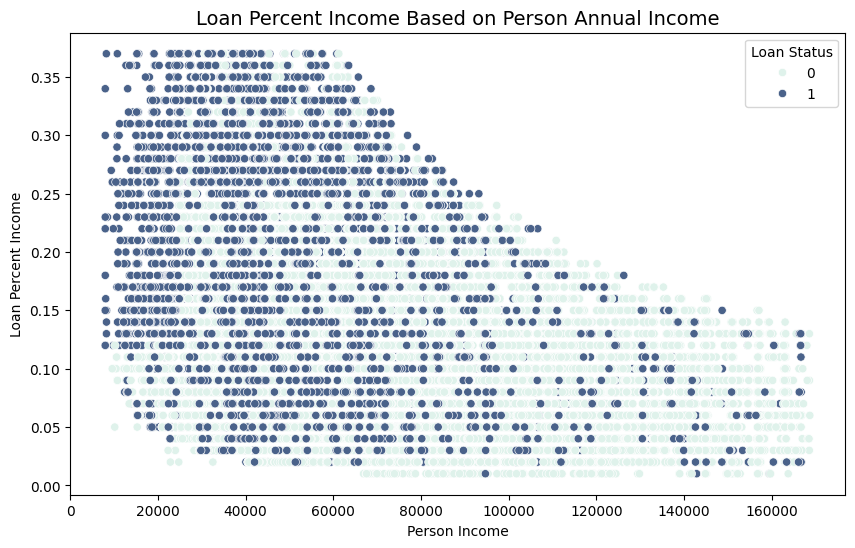

In [22]:
# Call the Function
income_vs_loan(loan_df)

The scatter plot shows the relation between income and loan percent based on the loan approval status. It shows that as the income increases the loan percent tends to decrease stating high income people are borrowing only small portion of income for loan amount whereas, less income people have high loan percent.

### **Annual Person Income**

In [23]:
# Function to Plot KDE Plot for income
def income_dist(dataset):
  """
  This function make a kde plot for showing income distribution.

  Input:
  dataset = Dataframe to be visualised

  Output:
  KDE Plot
  """
  # Define Figure Size
  plt.figure(figsize=(10, 6))

  # Make KDE
  kde_plt = sns.kdeplot(data=dataset['person_income'], fill=True, color=colour[1], alpha=0.7, edgecolor=colour[3])

  # Add Suitable Labels
  plt.xlabel("Person Income", fontsize = 10)
  plt.ylabel("Density", fontsize = 10)

  # Add a Suitable Title
  plt.title("Annual Person Income", fontsize = 14)

  # Show the Plot
  plt.show()

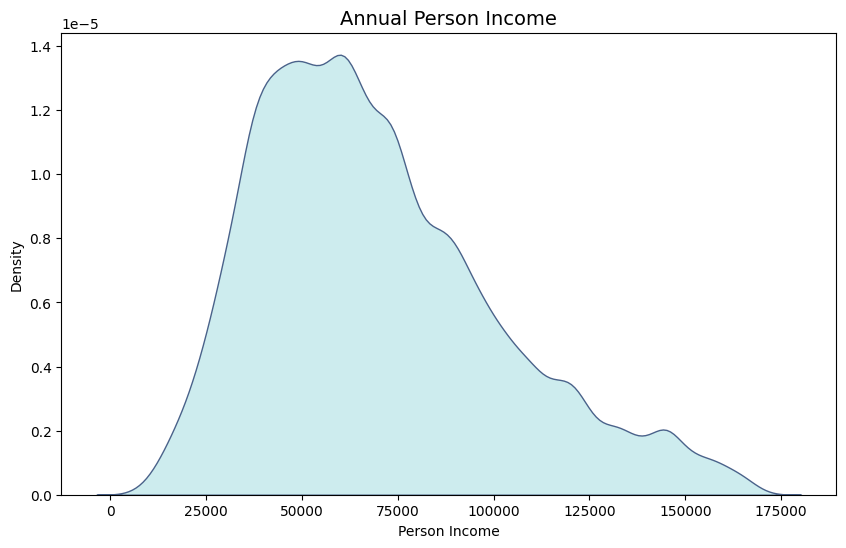

In [24]:
# Call the Function
income_dist(loan_df)

The income distribution plot is right skewed indicating that majority of people have less income and only small count of people have high income.

### **Correlation Among Numerical Columns**

In [25]:
# Function to Make a Correlation Plot for Numerical Columns
def corr_num_col(dataset):
  """
  This function make a correlation plot for showing correlation among numerical columns.

  Input:
  dataset = Dataframe that needs to be visualised

  Output:
  Correlation Plot
  """
  # Select Numerical Columns
  num_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
              'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

  # Calculate Correlation for the given Num Cols
  num_col_corr = dataset[num_cols].corr()

  # Define Figure Size
  plt.figure(figsize=(10, 6))

  # Make a Heatmap
  sns.heatmap(num_col_corr, annot=True, fmt=".3f", cmap='Blues', square=True, cbar=True,
                linewidths=0.5, linecolor='black', center=0)

  # Add a Suitable Title
  plt.title("Correlation Among all the Numerical Columns", fontsize = 14)

  # Show the Plot
  plt.show()

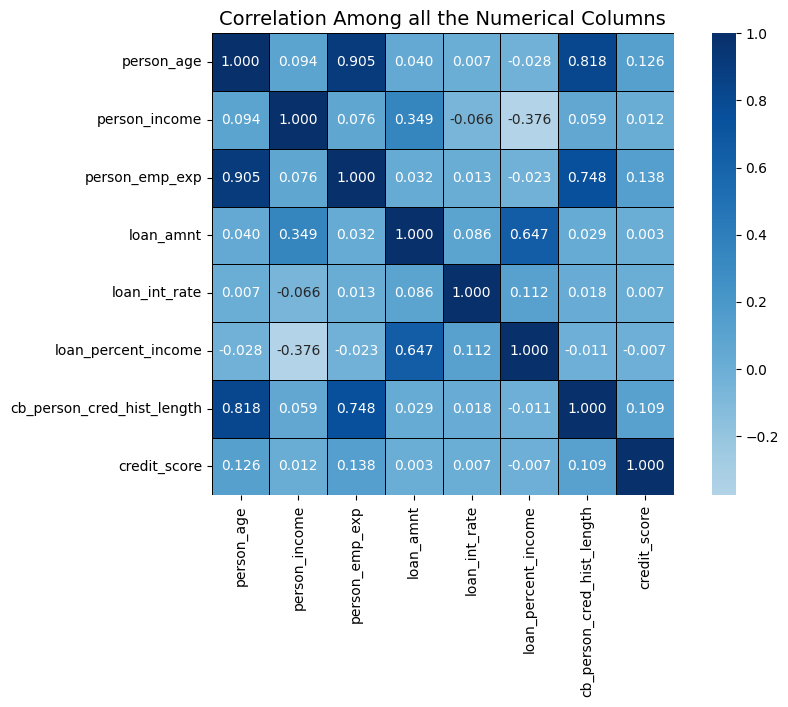

In [26]:
# Call the Function
corr_num_col(loan_df)

The heatmap shows a strong postive corrleation between person age and empolyment experience, stating the older people have more work experience then of younger people. There also seems to have moderate positive correlation between loan amount and loan percent income statting larger the loan amount higher the loan percentage relative to income. There also seems to have negative correlation between person income and loan percent income, indicating if the person have large income they take only small portion of loan amount based on their income.

## **Final Overview**

The analysis states that the loan approval is mainly influenced by income, telling high income increases loan approval chances. Education level is also an important factor as higher the edcuation higher the income and better loan outcomes. The data also suggest that older person with more work experience have more chances of loan approval.